In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

<AxesSubplot: >

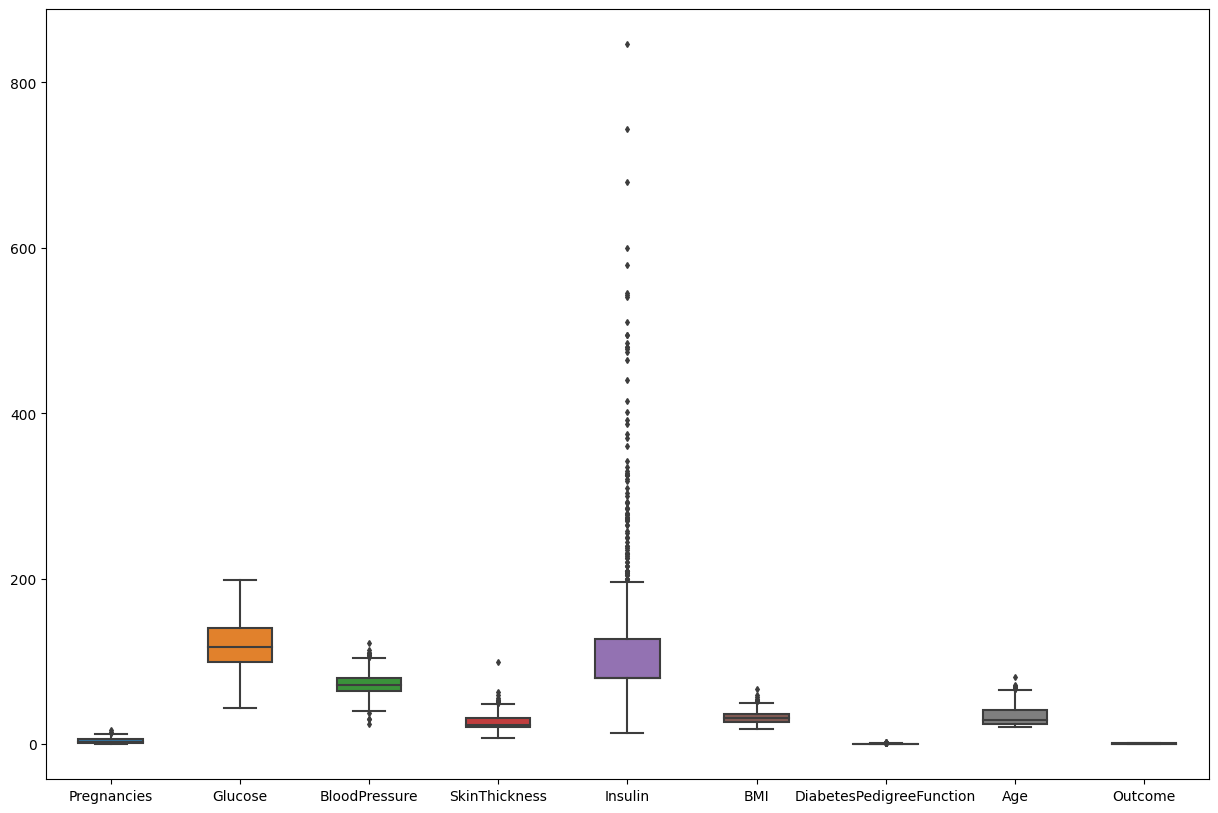

In [5]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

In [6]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0


In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

import pickle
def scaler_standard(X_train,X_test): #this isn't v.necessary in decision tree splitting cuz splitting will anyways happen even if values aint' changed
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.fit(X_test)
    
#     file=open('/April_May/Other_MLAs/scalarStandard.pkl','wb')
#     pickle.dump(scaler,file)
#     file.close()
    
    return X_train_scaled,X_test_scaled

X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)
X_test_scaled

StandardScaler()

In [9]:
X_train_scaled

array([[-0.8362943 , -0.89585789, -0.99370784, ..., -1.20340503,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.56374882, -0.01067906, ...,  0.66490433,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43257839, -0.33835532, ...,  1.44097129,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.69659245,  1.13618785, ...,  1.91523444,
         1.94892066,  0.42190587],
       [-1.14304979,  0.63184384, -0.24779635, ...,  1.4553429 ,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.10046932,  1.9553785 , ..., -1.40460758,
        -0.60836445, -1.03426754]])

In [10]:
import warnings 
warnings.filterwarnings('ignore')

parameters={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5,6],
    'max_features':['auto','sqrt','log2']
}

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()

clf=GridSearchCV(classifier,param_grid=parameters,scoring=accuracy_score,cv=5,verbose=2)
clf.fit(X_train,y_train)

clf.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion

[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, splitter=best; total ti

[CV] END criterion=entropy, max_depth=4, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_featu

[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2

[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'splitter': 'best'}

In [11]:
classifier=DecisionTreeClassifier(criterion='gini',max_depth=2,max_features='auto',splitter='best')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [12]:
confusion_mtx=confusion_matrix(y_pred,y_test)
confusion_mtx

array([[86, 14],
       [65, 66]], dtype=int64)

In [13]:
TP,FP,FN,TN=confusion_mtx[0][0],confusion_mtx[0][1],confusion_mtx[1][0],confusion_mtx[1][1]
print(TP,' ',FP,' ',FN,' ',TN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
f1_score=2*TP/(2*TP+FP+FN)
accuracy_score=(TP+TN)/(TP+TN+FP+FN)

86   14   65   66


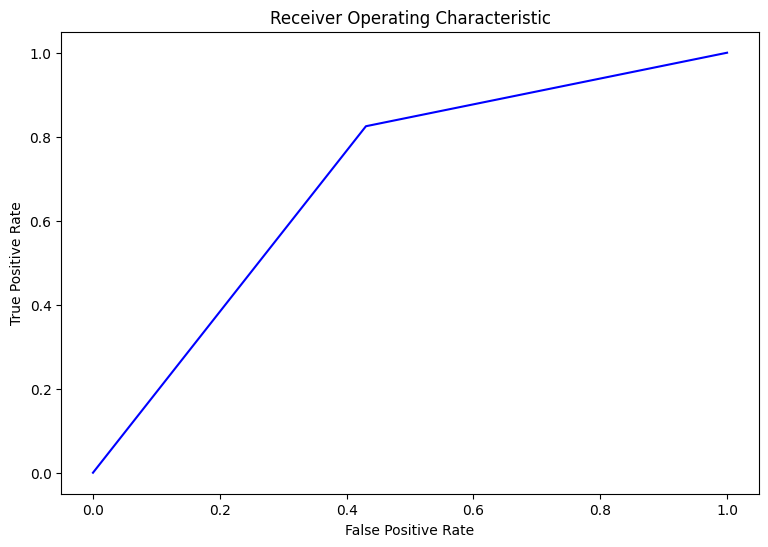

In [14]:
import sklearn.metrics as metrics

fpr,tpr,thresohld=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.figure(figsize=(9,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#SVC
from sklearn.svm import SVC

params={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001,0.0001],
        'kernel':['linear','polynomial','rbc']}
grid=GridSearchCV(SVC(),param_grid=params,verbose=3,cv=5,scoring='accuracy',refit=True)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.843 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.785 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.748 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.757 total time=   0.2s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ..........C=0.1, gamma=1, kernel=rbc;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0.1, gamma=1, kernel=r

[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.824 total time=   1.6s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.750 total time=   1.1s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.785 total time=   2.1s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.748 total time=   2.6s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.766 total time=   2.3s
[CV 1/5] END ...C=1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ..........C=1, gamma=0.1, kernel=rbc;, score=nan total time=   0.0s
[CV 2/5] END ..........C=1, gamma=0.1, kernel=rbc;, score=nan total time=   0.0s
[CV 3/5] END ..........C=1, 

[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.833 total time=  12.7s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.750 total time=  44.5s
[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.794 total time=  12.6s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.748 total time=  20.1s
[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.766 total time=  17.5s
[CV 1/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ........C=10, gamma=0.01, kernel=rbc;, score=nan total time=   0.0s
[CV 2/5] END ........C=10, gamma=0.01, kernel=rbc;, score=nan total time=   0.0s
[CV 3/5] END ........C=10, g

In [ ]:
svc_classifier=SVC(C=0.1,gamma=1,kernel='linear')
y_pred=svc_classifier.predict(X_test)

confusion_mtx=confusion_matrix(y_pred,y_test)
confusion_mtx

TP,FP,FN,TN=confusion_mtx[0][0],confusion_mtx[0][1],confusion_mtx[1][0],confusion_mtx[1][1]
print(TP,' ',FP,' ',FN,' ',TN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
f1_score=2*TP/(2*TP+FP+FN)
accuracy_score=(TP+TN)/(TP+TN+FP+FN)